### In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

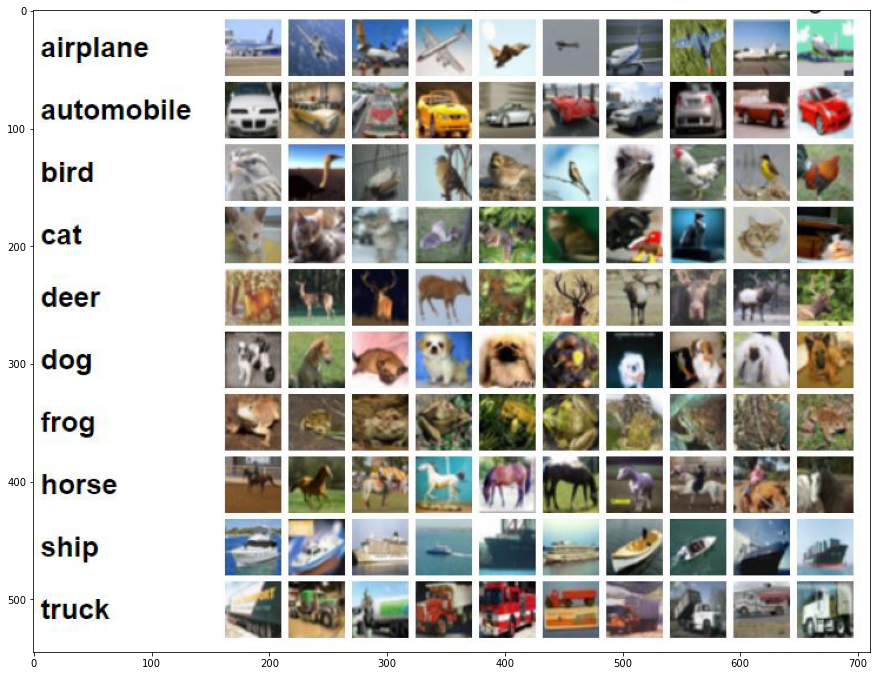

In [4]:
plt.figure(figsize=(15,15))
image = plt.imread("small_images.jpg")
plt.imshow(image)

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
# y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

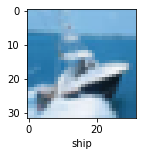

In [12]:
plot_sample(X_train, y_train, 8)

#### Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

## Normalizing the training data

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## Build simple artificial neural network for image classification

In [14]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 173s 71ms/step - loss: 1.8130 - accuracy: 0.3548
Epoch 2/3
1563/1563 [==============================] - 109s 69ms/step - loss: 1.6244 - accuracy: 0.4260
Epoch 3/3
1563/1563 [==============================] - 110s 70ms/step - loss: 1.5400 - accuracy: 0.4585


In [15]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.46      0.54      0.50      1000
           1       0.68      0.42      0.52      1000
           2       0.35      0.35      0.35      1000
           3       0.32      0.38      0.35      1000
           4       0.44      0.31      0.36      1000
           5       0.42      0.30      0.35      1000
           6       0.55      0.46      0.50      1000
           7       0.45      0.59      0.51      1000
           8       0.44      0.74      0.55      1000
           9       0.57      0.47      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.47      0.46      0.45     10000
weighted avg       0.47      0.46      0.45     10000



## Now let us build a convolutional neural network to train our images

In [16]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [17]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 187s 80ms/step - loss: 1.4325 - accuracy: 0.4873
Epoch 2/5
1563/1563 [==============================] - 40s 26ms/step - loss: 1.0750 - accuracy: 0.6261
Epoch 3/5
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9578 - accuracy: 0.6692
Epoch 4/5
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8818 - accuracy: 0.6942
Epoch 5/5
1563/1563 [==============================] - 40s 25ms/step - loss: 0.8202 - accuracy: 0.7147


In [19]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 35s 8ms/step - loss: 0.9526 - accuracy: 0.6693


[0.9525541067123413, 0.6693000197410583]

In [20]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.9911345e-03, 1.7467212e-02, 4.0110466e-03, 3.5582361e-01,
        4.2102709e-03, 2.1802045e-01, 2.0930288e-02, 3.6247033e-03,
        3.6109060e-01, 1.1830681e-02],
       [1.5455597e-03, 3.2392710e-01, 1.9483792e-05, 1.8929761e-05,
        6.8265834e-08, 3.7584812e-08, 2.4172227e-06, 9.7819701e-08,
        6.7354137e-01, 9.4497914e-04],
       [8.6586718e-03, 4.5100741e-02, 2.2226694e-04, 5.6818454e-04,
        5.7797897e-05, 3.0830161e-05, 1.9267932e-04, 4.1340856e-05,
        9.3979937e-01, 5.3280867e-03],
       [4.1239110e-01, 2.6611028e-02, 9.2383195e-03, 7.2068040e-04,
        1.3075916e-04, 1.2267081e-05, 1.6407725e-04, 1.9514502e-04,
        5.5043137e-01, 1.0525127e-04],
       [2.4834082e-05, 1.9711201e-04, 1.4722692e-02, 1.4020485e-02,
        7.2379015e-02, 3.3962545e-03, 8.9488822e-01, 4.8202171e-05,
        3.1596146e-04, 7.1300756e-06]], dtype=float32)

In [22]:
import pandas as pd


In [29]:
my_image = plt.imread("boeing-737.jpg")

In [30]:
my_image

array([[[120, 140, 167],
        [119, 139, 166],
        [118, 138, 165],
        ...,
        [134, 150, 175],
        [134, 150, 175],
        [134, 150, 175]],

       [[120, 140, 167],
        [120, 140, 167],
        [119, 139, 166],
        ...,
        [134, 150, 175],
        [134, 150, 175],
        [134, 150, 175]],

       [[120, 140, 167],
        [120, 140, 167],
        [120, 140, 167],
        ...,
        [135, 151, 176],
        [134, 150, 175],
        [134, 150, 175]],

       ...,

       [[102, 131, 161],
        [102, 129, 159],
        [101, 128, 158],
        ...,
        [123, 143, 170],
        [123, 143, 170],
        [124, 144, 171]],

       [[103, 132, 162],
        [102, 129, 159],
        [102, 129, 159],
        ...,
        [123, 143, 170],
        [123, 143, 170],
        [124, 144, 171]],

       [[104, 133, 163],
        [103, 130, 160],
        [103, 130, 160],
        ...,
        [123, 143, 170],
        [123, 143, 170],
        [124, 144, 171]]

#### The first thing we have to do is to resize the image of our airplane so that we can fit it into our model (input size of 32 * 32 * 3). Instead of coding a resize function ourselves, let’s download a package called ‘scikit-image’ which would help us with that function.

In [31]:
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))

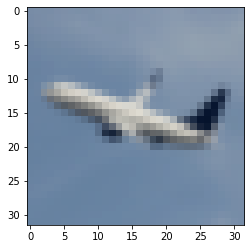

In [32]:
img = plt.imshow(my_image_resized)

#### Note that the resized image has pixel values already scaled between 0 and 1, so we need not apply the pre-processing steps that we previously did for our training image. And now, we see what our trained model will output when given an image of our cat, using the code of cnn.predict:

In [34]:
probabilities = cnn.predict(np.array([my_image_resized,]))
probabilities

array([[9.3241298e-01, 1.8623669e-04, 9.2672819e-04, 2.0436746e-04,
        1.2313861e-04, 3.5301223e-06, 9.1644048e-05, 2.0371110e-06,
        6.6014141e-02, 3.5204652e-05]], dtype=float32)

In [35]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: airplane -- Probability: 0.932413
Second most likely class: ship -- Probability: 0.06601414
Third most likely class: bird -- Probability: 0.0009267282
Fourth most likely class: cat -- Probability: 0.00020436746
Fifth most likely class: automobile -- Probability: 0.00018623669
